### 이상치 제거

In [9]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')

# 여기에 코드를 작성하세요.
q1 = cellphone_df['price'].quantile(0.25)
q3 = cellphone_df['price'].quantile(0.75)
IQR = q3 - q1

condition1=cellphone_df['price']>q3+1.5*IQR
condition2=cellphone_df['price']<q1+1.5*IQR

# idx = cellphone_df[condition1 | condition2].index
# cellphone_df.drop(idx,inplace=True)

cellphone_df[condition2]

,brand,name,size,price,battery,weight,year
0,apple,iPhone 14 (128GB),"6.1""",1250.0,3729,172.0,2022
1,apple,iPhone 14 (256GB),"6.1""",1400.0,3729,172.0,2022
2,Apple,iPhone 14 (512GB),"6.1""",1700.0,3729,172.0,2022
3,apple,iPhone 14 Plus (128GB),"6.7""",1350.0,4325,203.0,2022
4,APPLE,iPhone 14 Plus (256GB),"6.7""",1500.0,4325,203.0,2022
...,...,...,...,...,...,...,...
64,samsung,Galaxy S20 Ultra (256GB),"6.9""",1595.0,5000,220.0,2020
65,SAMSUNG,Galaxy S20 Ultra (512GB),"6.9""",1793.0,5000,220.0,2020
66,samsung,Galaxy S20+ (256GB),"6.7""",1353.0,4500,186.0,2020
67,SAMSUNG,Galaxy Z Flip2 (256GB),"6.7""",1650.0,3300,183.0,2020


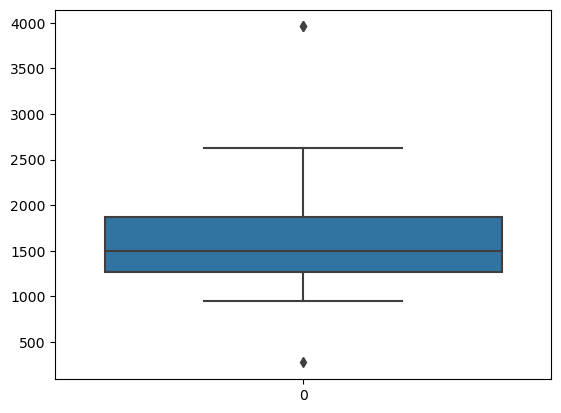

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

sns.boxplot(cellphone_df['price'])

plt.show()

# cellphone_df[condition2]

In [ ]:
condition1=cellphone_df['price']>q3+1.5*IQR
# condition2=cellphone_df['price']<q1-1.5*IQR

### 문자데이터 실습

In [71]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')

# 여기에 코드를 작성하세요.
# brand 칼럼에 첫글자 대문자, 나머지 소문자
cellphone_df['brand'] = cellphone_df['brand'].str[0].str.upper() + cellphone_df['brand'].str[1:].str.lower()
cellphone_df

# name 컬럼에 모델명은 model, 용량은 capacity
def get_name(x):
    return x.split('(')[0]

cellphone_df['model'] = cellphone_df['name'].apply(get_name)
cellphone_df['capacity'] = cellphone_df['name'].str.split('(').str[1].str[:-1]

cellphone_df['model'] = cellphone_df['model'].str.strip()
cellphone_df['capacity'] = cellphone_df['capacity'].str.strip()

# size 컬럼에 " 기호 삭제 후 숫자형으로 변환
cellphone_df['size'] = cellphone_df['size'].str[:-1]
cellphone_df['size'] = cellphone_df['size'].astype('float')

cellphone_df.drop('name', axis=1, inplace=True)
cellphone_df


,brand,size,price,battery,weight,year,model,capacity
0,Apple,6.1,1250.0,3729,172.0,2022,iPhone 14,128GB
1,Apple,6.1,1400.0,3729,172.0,2022,iPhone 14,256GB
2,Apple,6.1,1700.0,3729,172.0,2022,iPhone 14,512GB
3,Apple,6.7,1350.0,4325,203.0,2022,iPhone 14 Plus,128GB
4,Apple,6.7,1500.0,4325,203.0,2022,iPhone 14 Plus,256GB
...,...,...,...,...,...,...,...,...
65,Samsung,6.9,1793.0,5000,220.0,2020,Galaxy S20 Ultra,512GB
66,Samsung,6.7,1353.0,4500,186.0,2020,Galaxy S20+,256GB
67,Samsung,6.7,1650.0,3300,183.0,2020,Galaxy Z Flip2,256GB
68,Samsung,7.6,1892.0,4500,282.0,2020,Galaxy Z Fold2,256GB


In [75]:
import pandas as pd

patient_df = pd.read_csv('data/patient.csv')

# 여기에 코드를 작성하세요.
# 몸무게를 키의 제곱으로 나눠줌
patient_df['bmi'] = round(patient_df['weight'] / patient_df['height'] ** 2, 1)

In [79]:
import pandas as pd

patient_df = pd.read_csv('data/patient.csv')

patient_df['weight'] = (patient_df['weight'] - patient_df['weight'].min()) / (patient_df['weight'].max() - patient_df['weight'].min())


In [81]:
patient_df['weight'].describe()

count    348.000000
mean       0.352952
std        0.181349
min        0.000000
25%        0.230244
50%        0.331707
75%        0.446829
max        1.000000
Name: weight, dtype: float64

In [82]:
import pandas as pd

patient_df = pd.read_csv('data/patient.csv')

# 여기에 코드를 작성하세요.
patient_df['weight'] = (patient_df['weight'] - patient_df['weight'].mean()) / patient_df['weight'].std()